# Pymaceuticals Inc.
---

### Analysis

1. The clinical trial study was well planned with nearly equal participation of both sexes.
2. There was a strong correlation between higher Mouse weight and average tumor volume in Capomulin regimen.
3. Zoniferol, Naftisol and Propriva were less effective than Capomulin, Ceftamin or Infubinol in preventing metastasis.
4. Overall, the drug regiment were less effective in mice with higher body weight.





 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
clintrial_df=pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
clintrial_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.
unique_mice_ids = clintrial_df['Mouse ID'].nunique()
print(f"The number of unique mice IDs in the data is: {unique_mice_ids}")

The number of unique mice IDs in the data is: 249


In [3]:
# Checking the number of mice.
clintrial_df["Mouse ID"].value_counts()

Mouse ID
g989    13
a203    10
n364    10
m546    10
m550    10
        ..
x226     1
b447     1
f932     1
l872     1
n482     1
Name: count, Length: 249, dtype: int64

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_df =clintrial_df[clintrial_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mice_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
587,g989,Propriva,Female,21,26,0,45.000000,0
589,g989,Propriva,Female,21,26,5,47.570392,0
591,g989,Propriva,Female,21,26,10,49.880528,0
593,g989,Propriva,Female,21,26,15,53.442020,0
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_all=clintrial_df.loc[clintrial_df["Mouse ID"] =="g989", :]
duplicate_mice_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = clintrial_df[clintrial_df["Mouse ID"] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice = clean_df['Mouse ID'].nunique()
print(f"Number of unique mice IDs in the clean DataFrame: {num_unique_mice}")

Number of unique mice IDs in the clean DataFrame: 248


## Summary Statistics

In [8]:
#list all the columns name in the clean dataframe
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [9]:
# list the number of unique drug regimen
drug_regimen_counts = clean_df['Drug Regimen'].nunique()
drug_regimen_counts

10

In [10]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# group by Drug Regimen	
regimen_group = clean_df.groupby(clean_df["Drug Regimen"])

# calculate statistics
mice_mean = regimen_group["Tumor Volume (mm3)"].mean()
mice_median = regimen_group["Tumor Volume (mm3)"].median()
mice_var = regimen_group["Tumor Volume (mm3)"].var()
mice_std = regimen_group["Tumor Volume (mm3)"].std()
mice_sem = regimen_group["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe.
statistics_summary = pd.DataFrame({ "Mean Tumor Volume": mice_mean,
                            "Median Tumor Volume": mice_median,
                            "Tumor Volume Variance": mice_var,
                            "Tumor Volume Std. Dev.": mice_std,
                            "Tumor Volume Std. Err.": mice_sem }).style.set_caption("Summary Stastics for Tumor Volume (mm3)")
statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = clean_df[["Tumor Volume (mm3)", "Drug Regimen"]].groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"]).style.set_caption("Summary Stastics")

#print(summary_stats)
summary_statistics_agg

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Timepoint'>

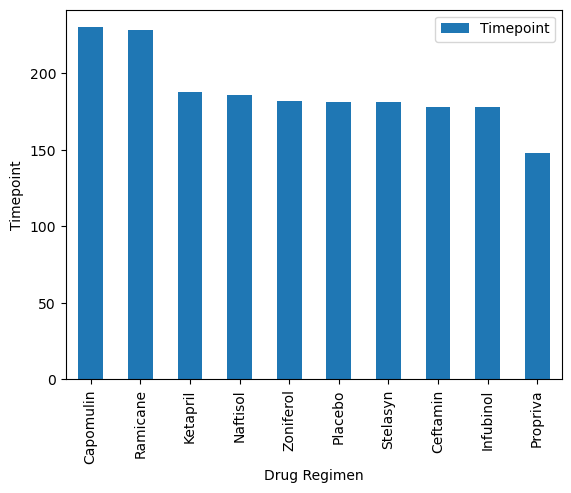

In [12]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_timepoints = clean_df[["Timepoint", "Drug Regimen"]].groupby(["Drug Regimen"]).count()

# Sort data for plotting
sort_timepoints = total_timepoints.sort_values(["Timepoint"], ascending=False)

# Plot bar chart using pandas
timepoints_plot = sort_timepoints.plot.bar()
timepoints_plot.set_xlabel("Drug Regimen")
timepoints_plot.set_ylabel("Timepoint")

timepoints_plot

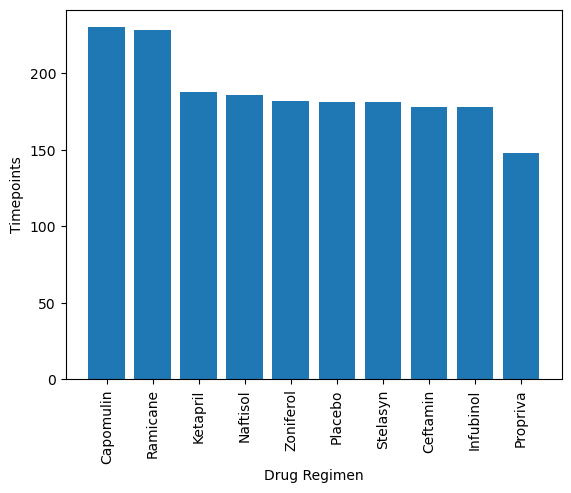

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(sort_timepoints.index, sort_timepoints['Timepoint'], align='center')

# Set axis labels
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints') 

plt.xticks(rotation='vertical')

# Show plot using pyplot
plt.show()

In [14]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
#print the number of mice by sex
mice_gender = clean_df.groupby(["Sex"]).count()
print(mice_gender)

        Mouse ID  Drug Regimen  Age_months  Weight (g)  Timepoint  \
Sex                                                                 
Female       922           922         922         922        922   
Male         958           958         958         958        958   

        Tumor Volume (mm3)  Metastatic Sites  
Sex                                           
Female                 922               922  
Male                   958               958  


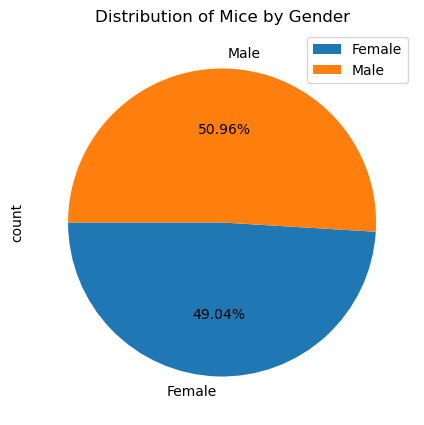

In [15]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Make the pie chart

gender_plot = mice_gender.plot.pie(startangle=180, y = "Mouse ID", title= "Distribution of Mice by Gender", autopct= "%1.2f%%", figsize=(5, 5))

# legend location, remove label
gender_plot.legend(loc="best")
gender_plot.set_ylabel("count")
plt.savefig('images/mice_dist_gender_panda')

# Show clean plot
plt.show()

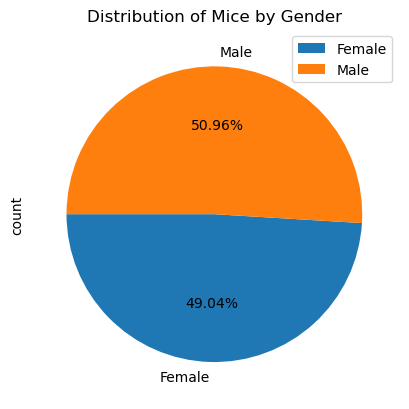

In [16]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender = clean_df.groupby(["Sex"])["Sex"].count()

# Make the pie chart

plt.pie(mice_gender, startangle=180, autopct='%1.2f%%', labels=('Female', 'Male'))

# add title, headings and legend
plt.title("Distribution of Mice by Gender")
plt.legend(labels=('Female', 'Male'), loc='best')
plt.ylabel ("count")
plt.savefig('images/mice_dist_gender_pyplot')

# show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoints = clean_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_merge = pd.merge(greatest_timepoints, clean_df, on=("Mouse ID", "Timepoint"))
greatest_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin_data = []
ramicane_data = []
infubinol_data = []
ceftamin_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in greatest_merge.iterrows():
    if row["Drug Regimen"] == treatments[0]:
        capomulin_data.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        ramicane_data.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        infubinol_data.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        ceftamin_data.append(row['Tumor Volume (mm3)'])   
 


    # add subset
treatments_df = pd.DataFrame({treatments[0]: capomulin_data,
                       treatments[1]: ramicane_data,
                       treatments[2]: infubinol_data,
                       treatments[3]: ceftamin_data
                       })

treatments_df.head()

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078


In [19]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

capomulin_data = greatest_merge.loc[greatest_merge['Drug Regimen'] == 'Capomulin']
quartiles = capomulin_data['Tumor Volume (mm3)'].quantile([0.25, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

# Determine potential outliers
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
cap_potential_outliers = capomulin_data.loc[(capomulin_data['Tumor Volume (mm3)'] < lower_bound) | (capomulin_data['Tumor Volume (mm3)'] > upper_bound), 'Tumor Volume (mm3)']

#Ramicane
ramicane_data = greatest_merge.loc[greatest_merge['Drug Regimen'] == 'Ramicane']
quartiles = ramicane_data['Tumor Volume (mm3)'].quantile([0.25, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

# Determine potential outliers
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
ram_potential_outliers = ramicane_data.loc[(ramicane_data['Tumor Volume (mm3)'] < lower_bound) | (ramicane_data['Tumor Volume (mm3)'] > upper_bound), 'Tumor Volume (mm3)']


#Infubinol
infubinol_data = greatest_merge.loc[greatest_merge['Drug Regimen'] == 'Infubinol']
quartiles = infubinol_data['Tumor Volume (mm3)'].quantile([0.25, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

# Determine potential outliers
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
inf_potential_outliers = infubinol_data.loc[(infubinol_data['Tumor Volume (mm3)'] < lower_bound) | (infubinol_data['Tumor Volume (mm3)'] > upper_bound), 'Tumor Volume (mm3)']

#Ceftamin
ceftamin_data = greatest_merge.loc[greatest_merge['Drug Regimen'] == 'Ceftamin']
quartiles = ceftamin_data['Tumor Volume (mm3)'].quantile([0.25, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

# Determine potential outliers
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
cet_potential_outliers = ceftamin_data.loc[(infubinol_data['Tumor Volume (mm3)'] < lower_bound) | (ceftamin_data['Tumor Volume (mm3)'] > upper_bound), 'Tumor Volume (mm3)']


print('Capomulin potential outliers', cap_potential_outliers)
print('Ramicane potential outliers', ram_potential_outliers)
print('Infubinol potential outliers', inf_potential_outliers)
print('Ceftamin potential outliers', cet_potential_outliers)

Capomulin potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


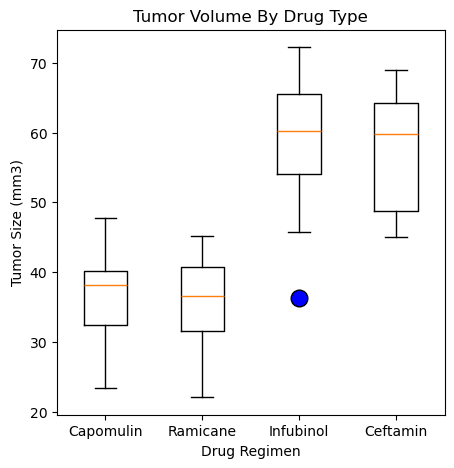

In [20]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Style outlier/flier to stand out
outliers = dict(marker='o', markerfacecolor='blue', markersize=12)

# Lists to plot
plot_list = [treatments_df[treatments[0]],
                treatments_df[treatments[1]],
                treatments_df[treatments[2]],
                treatments_df[treatments[3]]]

# Plot output and styling
fig1, ax = plt.subplots(figsize=(5,5))
ax.set_title('Tumor Volume By Drug Type') 
ax.set_xlabel('Drug Regimen') 
ax.set_ylabel('Tumor Size (mm3)') 
ax.boxplot(plot_list, flierprops=outliers)
#ax.boxplot(plot_list, patch_artist=True, boxprops=dict(facecolor='black'), showmeans=False, flierprops=outliers)
plt.xticks([1,2,3,4], treatments)
plt.savefig('images/tumor_size_drugtype')
plt.show()


## Line and Scatter Plots

In [21]:
#This cell is extra, I needed to get infoirmation about dataframe.
greatest_merge.head(50)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


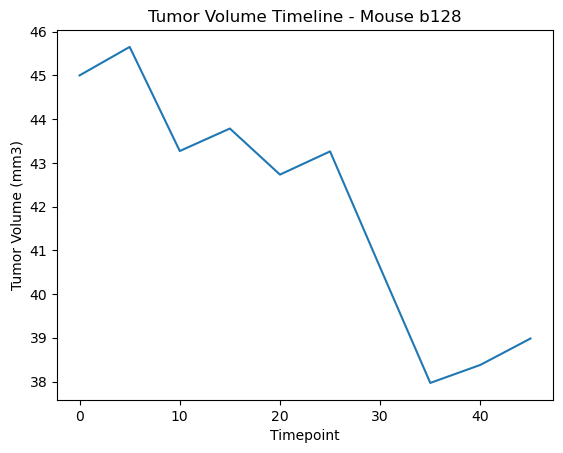

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#I picked up mouse b128 (female) for this analysis, final tumor vol ~38 mm greatest_merge_df

mouse_b128 = clean_df.loc[clean_df["Mouse ID"] == "b128",:]

# set plot axis data
x_mouse = mouse_b128["Timepoint"]
y_mouse = mouse_b128["Tumor Volume (mm3)"]

# Plot output and styling
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Tumor Volume Timeline - Mouse b128")
plt.plot(x_mouse, y_mouse,) 
plt.savefig('images/Tumor-Vol_b128')
plt.show()

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
174      b128    Capomulin  Female           9          22          0   
175      b128    Capomulin  Female           9          22          5   
176      b128    Capomulin  Female           9          22         10   
177      b128    Capomulin  Female           9          22         15   
178      b128    Capomulin  Female           9          22         20   
...       ...          ...     ...         ...         ...        ...   
1831     y793    Capomulin    Male          17          17         25   
1832     y793    Capomulin    Male          17          17         30   
1833     y793    Capomulin    Male          17          17         35   
1834     y793    Capomulin    Male          17          17         40   
1835     y793    Capomulin    Male          17          17         45   

      Tumor Volume (mm3)  Metastatic Sites  
174            45.000000                 0  
175            45.651331         

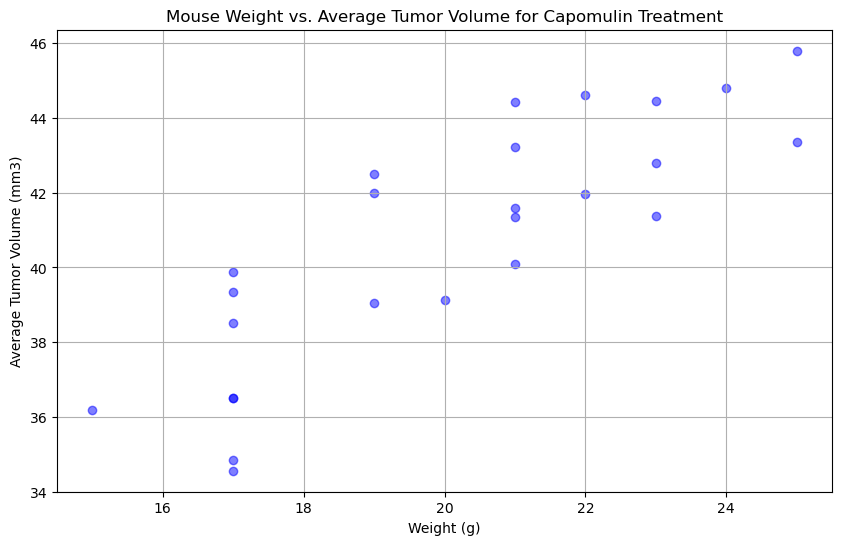

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#prepare a new df with capomulin tretaed mice only.
# Filter the original DataFrame to create a new DataFrame with only Capomulin data
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Display the new DataFrame with Capomulin data
print(capomulin_df)


# Taking capomulin_df as parent DataFrame containing the Capomulin data
# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()

# Merge the average tumor volume with the weights
cap_merged_df = average_tumor_volume.merge(capomulin_df[["Mouse ID", "Weight (g)"]].drop_duplicates(), on="Mouse ID")

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cap_merged_df["Weight (g)"], cap_merged_df["Tumor Volume (mm3)"], color='blue', alpha=0.5)
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

In [24]:
correlation_coefficient = cap_merged_df['Weight (g)'].corr(cap_merged_df['Tumor Volume (mm3)'])
print("Correlation Coefficient:", correlation_coefficient)


Correlation Coefficient: 0.8419363424694722


In [25]:
cap_merged_df

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22
1,b742,40.083699,21
2,f966,36.505973,17
3,g288,41.990097,19
4,g316,44.613344,22
5,i557,44.805810,24
6,i738,39.141053,20
7,j119,44.465236,23
8,j246,43.216925,21
9,l509,44.434474,21


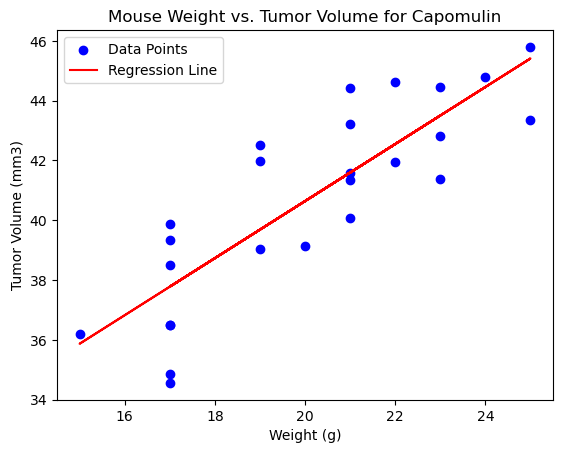

In [26]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Prepare the data for linear regression
X = cap_merged_df[['Weight (g)']]  # Mouse weight
y = cap_merged_df['Tumor Volume (mm3)']  # Average observed tumor volume

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)


# Make predictions
predictions = model.predict(X)


# Plot the data and the regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, predictions, color='red', label='Regression Line')


plt.title('Mouse Weight vs. Tumor Volume for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
#plt. annotate(line_eq, (5.8,0.8), fontsize=15, color="red")
plt.show()
